# A Time-Dependent Flow Reactor: Periodic Ignition/Extinction

_This demo is part of Spitfire, with [licensing and copyright info here.](https://github.com/sandialabs/Spitfire/blob/master/license.md)_


_Highlights_
- How to add time-dependence to a `HomogeneousReactor` model

## Introduction

This demonstration considers a reactor model with a slowly oscillating feed temperature. The frequency of this oscillation is low enough that it triggers repeated ignition/extinction events. Time-dependence is introduced with a Python `lambda` function.

In [7]:
from spitfire import ChemicalMechanismSpec, HomogeneousReactor
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mech = ChemicalMechanismSpec(cantera_xml='h2-burke.xml', group_name='h2-burke')

air = mech.stream(stp_air=True)
fuel = mech.stream('X', 'H2:1')

mix = mech.mix_for_equivalence_ratio(1.0, fuel, air)
mix.TP = 800., 101325.

## Time-dependent Feed Temperature

Unlike reactors in simpler demonstrations, this reactor involves flow (`mass_transfer='open'`), and Spitfire requires the residence time (`mixing_tau`) and feed stream, specified through the `feed_temperature` and `feed_mass_fractions` arguments. Any of these arguments can be functions of time, as shown below for the feed temperature.

Next we simply integrate this reactor over a time period - two periods of oscillation of the feed temperature.

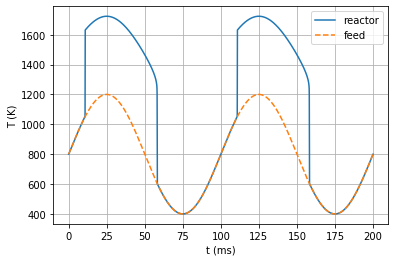

In [15]:
feed = mech.copy_stream(mix)
feed_temperature_fxn = lambda t: 800. + 400. * np.sin(2. * np.pi * 10. * t)

reactor = HomogeneousReactor(mech, mix,
                             configuration='isobaric',
                             heat_transfer='adiabatic',
                             mass_transfer='open',
                             mixing_tau=1.e-5,
                             feed_temperature=feed_temperature_fxn,
                             feed_mass_fractions=feed.Y)

output = reactor.integrate_to_time(0.2, transient_tolerance=1.e-10)

times = output.time_values

plt.plot(times * 1.e3, output['temperature'], '-', label='reactor')
plt.plot(times * 1.e3, feed_temperature_fxn(times), '--', label='feed')

plt.ylabel('T (K)')
plt.xlabel('t (ms)')
plt.legend()
plt.grid()

plt.show()

While it's clear that the reactor ignites on the upswing of the feed temperature, and is extinguished on the downswing, we could also visualize the chemcial composition. The output from the integration is a `Library` object, with a single dimension of time, which we can simply print to see all the fields available.

In [17]:
print(output)


Spitfire Library with 1 dimensions and 13 properties
------------------------------------------
1. Dimension "time" spanning [0.0, 0.2] with 3400 points
------------------------------------------
temperature         , min = 400.00023760816015 max = 1723.4172921512559
pressure            , min = 101325.0 max = 101325.0
mass fraction HE    , min = -5.551115123125783e-16 max = 7.771561172376096e-16
mass fraction H     , min = 0.0 max = 0.004325863975340061
mass fraction H2    , min = 0.006810714712865773 max = 0.028634460764729135
mass fraction O     , min = 0.0 max = 0.015190690085155157
mass fraction OH    , min = 0.0 max = 0.01517887950146069
mass fraction H2O   , min = 0.0 max = 0.15018436327110132
mass fraction O2    , min = 0.06530244961447292 max = 0.22726263049348533
mass fraction HO2   , min = 0.0 max = 0.00029422117189264844
mass fraction H2O2  , min = 0.0 max = 5.528833951840396e-06
mass fraction N2    , min = 0.7441029087417855 max = 0.7441029087417855
mass fraction AR    , m

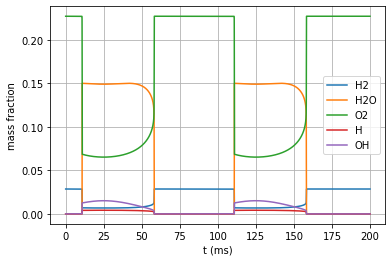

In [25]:
for s in ['H2', 'H2O', 'O2', 'H', 'OH']:
    plt.plot(times * 1.e3, output[f'mass fraction {s}'], label=s)

plt.ylabel('mass fraction')
plt.xlabel('t (ms)')
plt.legend()
plt.grid()

plt.show()

## Conclusions

This notebook shows how to incorporate mass flow in a reactor model and have the temperature of the feed stream vary with time.